In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 이미지 분석을 위한 minst 데이터 불러오기 (28x28 이미지)

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

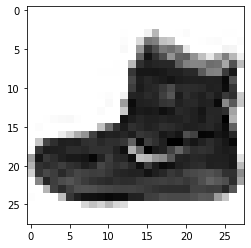

In [4]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

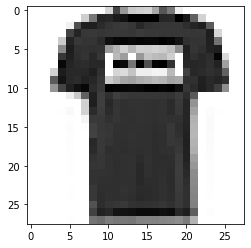

In [5]:
plt.imshow(train_input[1], cmap='gray_r')
plt.show()

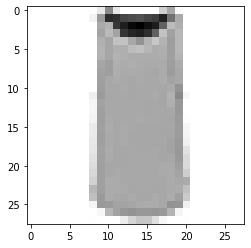

In [6]:
plt.imshow(train_input[2], cmap='gray_r')
plt.show()

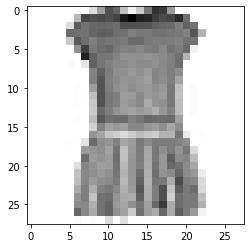

In [7]:
plt.imshow(train_input[3], cmap='gray_r')
plt.show()

In [8]:
# 신경망 구성법 1
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 신경망 구성법 2
# name 설정시 Dense 안에서는 영어로만 정의 가능
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid',input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax',name='output')]
            , name = '패션 MNIST 모델')
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 신경망 구성법 3
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### 패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해 넘파이 배열의 reshape() 메서드를 사용해 1차원으로 펼쳐야 함
#### Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할
#### 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다

In [36]:
# 신경망 구성법 4
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [38]:
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples


2021-12-03 12:01:31.480577: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Epoch 1/5
48000/48000 [==============================] - 3s 55us/sample - loss: 0.5279 - acc: 0.8143
Epoch 2/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.3909 - acc: 0.8588
Epoch 3/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.3546 - acc: 0.8727
Epoch 4/5
48000/48000 [==============================] - 2s 50us/sample - loss: 0.3315 - acc: 0.8801
Epoch 5/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.3161 - acc: 0.8874


In [39]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 27us/sample - loss: 0.3581 - acc: 0.8785


[0.3580692957341671, 0.8785]

#### 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해주어야 하는 파라미터
    + 신경망 층수, 학습률, 다양한 손실함수 알고리즘, 최적화 함수
#### 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 지정해 주어야 할 하이퍼 파라미터 

#### 경사하강법 : sgd

In [40]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD()
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 42us/sample - loss: 0.8033 - acc: 0.7425
Epoch 2/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.5402 - acc: 0.8168
Epoch 3/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.4910 - acc: 0.8316
Epoch 4/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.4648 - acc: 0.8404
Epoch 5/5
48000/48000 [==============================] - 2s 40us/sample - loss: 0.4472 - acc: 0.8461


In [41]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 26us/sample - loss: 0.4657 - acc: 0.8363


[0.46571148447195687, 0.83633333]

In [42]:
# 학습률 기본값 0.01 -> 0.1
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 42us/sample - loss: 0.7829 - acc: 0.7516
Epoch 2/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.5338 - acc: 0.8208
Epoch 3/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.4871 - acc: 0.8345
Epoch 4/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.4605 - acc: 0.8409
Epoch 5/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.4416 - acc: 0.8476


In [43]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 27us/sample - loss: 0.4499 - acc: 0.8409


[0.44986143577098847, 0.8409167]

In [44]:
# 아다그라드
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 47us/sample - loss: 1.1531 - acc: 0.6484
Epoch 2/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.7641 - acc: 0.7541
Epoch 3/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.6796 - acc: 0.7816
Epoch 4/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.6355 - acc: 0.7958
Epoch 5/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.6068 - acc: 0.8048


In [45]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 37us/sample - loss: 0.6109 - acc: 0.8002


[0.6109288535118103, 0.80016667]

In [46]:
# 아담
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 48us/sample - loss: 0.5310 - acc: 0.8162
Epoch 2/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3961 - acc: 0.8587
Epoch 3/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3561 - acc: 0.8714
Epoch 4/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3298 - acc: 0.8799
Epoch 5/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3074 - acc: 0.8880


In [47]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 27us/sample - loss: 0.3387 - acc: 0.8813


[0.3387275890111923, 0.88133335]

## drop_out
+ 드롭아웃은 딥러닝의 아버지로 불리는 제프리 힌턴이 소개
+ 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
+ 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고
+ 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있음

In [51]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs=20, verbose=1)

Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.5878 - acc: 0.7923
Epoch 2/20
48000/48000 [==============================] - 3s 56us/sample - loss: 0.4457 - acc: 0.8408
Epoch 3/20
48000/48000 [==============================] - 3s 55us/sample - loss: 0.4197 - acc: 0.8546
Epoch 4/20
48000/48000 [==============================] - 3s 55us/sample - loss: 0.4082 - acc: 0.8602
Epoch 5/20
48000/48000 [==============================] - 3s 57us/sample - loss: 0.4010 - acc: 0.8629
Epoch 6/20
48000/48000 [==============================] - 3s 56us/sample - loss: 0.3921 - acc: 0.8669
Epoch 7/20
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3912 - acc: 0.8672
Epoch 8/20
48000/48000 [==============================] - 3s 56us/sample - loss: 0.3849 - acc: 0.8714
Epoch 9/20
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3833 - acc: 0.8729
Epoch 10/20
48000/48000 [==============================] - 

In [52]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 31us/sample - loss: 0.4524 - acc: 0.8766


[0.4524065822760264, 0.87658334]

In [53]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs=5, verbose=1)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 59us/sample - loss: 0.5868 - acc: 0.7927
Epoch 2/5
48000/48000 [==============================] - 3s 57us/sample - loss: 0.4445 - acc: 0.8428
Epoch 3/5
48000/48000 [==============================] - 3s 57us/sample - loss: 0.4185 - acc: 0.8537
Epoch 4/5
48000/48000 [==============================] - 3s 56us/sample - loss: 0.4071 - acc: 0.8594
Epoch 5/5
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3997 - acc: 0.8620


In [54]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 31us/sample - loss: 0.4027 - acc: 0.8610


[0.4027498210867246, 0.861]

### 손실과 정확도 그래프

In [55]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# loss와 acc를 dict 형태로 저장
# verbose 0 - 훈련과정안나오게하기
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) 

In [59]:
history.history.keys()

dict_keys(['loss', 'acc'])

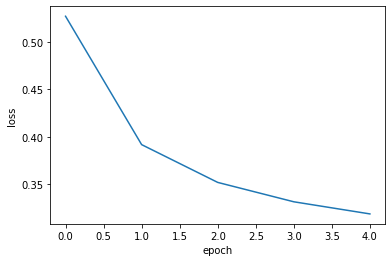

In [61]:
# 훈련된 모델의 오차 손실변화 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

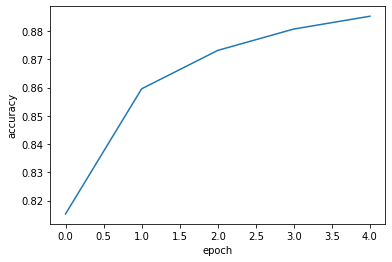

In [62]:
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수 뿐만 아니라 검증 세트에 대한 점수도 필요
+ fit 함수에 validation_data 속성을 정의해야 함

In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

SystemError: <built-in function TF_NewBuffer> returned a result with an error set

In [64]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

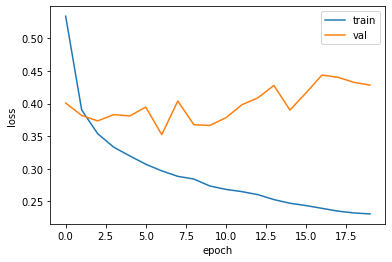

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()  
# 차이가 너무 클 경우 분석시에 뭔가 잘못되었을 가능성이 높음
# -> 하이퍼파라미터 적용

#### 최적화 함수를 아담으로 설정

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [67]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

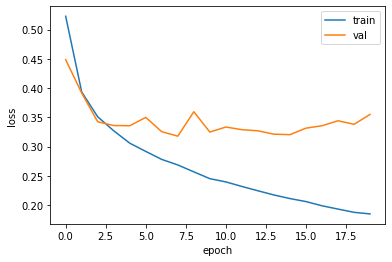

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()  

#### 최적화 함수를 아담으로 설정, 드롭아웃 추가

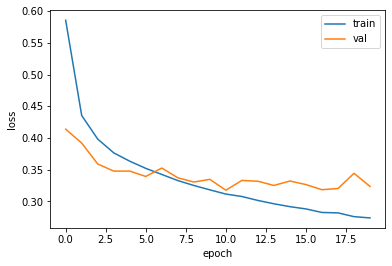

In [69]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#### epoch가 7 이전까지는 훈련시 오차보다 테스트시 오차가 더 적음
#### 이 지점 이후 훈련에 대한 필요성 하락 -> 조기종료

### 훈련 조기종료 - early stopping
+ ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만나는 모델을 저장

#### EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용
+ 가장 낮은 검증 손실의 모델을 파일에 저장
+ 검증 손실이 다시 상승할 때 훈련 중지

In [5]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# 훈련시 가장 적은 오차를 지닌 모델을 파일로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-model.h5')
# 훈련시 가장 적은 오차를 기준으로 오차가 다시 상승하면 훈련을 중지
# patience : 오차 증가 용인 횟수 지정
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# 위에서 정의한 ModelCheckpoint와 early_stopping을 callbacks 속성에 리스트로 지정
history= model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

2021-12-03 13:10:03.845899: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [9]:
early_stopping_cb.stopped_epoch

15

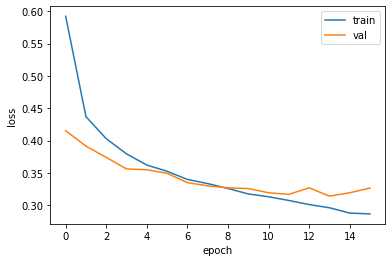

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()